## Assignment 5 - Risk

### Introduction to the Task

The objective of this task is to create a Python program (or Jupyter Notebook) called `assignment_5_risk` that simulates 1,000 individual battle rounds of the Risk board game. The goal is to simulate a sequence of attacker versus defender dice rolls, following the game's rules, and to plot the results of these simulations.

In Risk, battles are fought between two armies: one attacker and one defender. Each battle round is determined by rolling dice according to the following rules:

- **Number of Dice:** The attacker rolls up to three six-sided dice, while the defender rolls up to two six-sided dice.

#### Battle Rules

1. **Dice Comparison:** The highest dice from both sides are compared. If the attacker's die is higher, the defender loses one troop. If the attacker's die is lower or the same, the attacker loses one troop.
   
2. **Second Dice Comparison:** The second-highest dice are then compared between the attacker and defender, using the same rule to determine losses.

The simulation will run for 1,000 rounds of battles, and after each round, the number of losses for both the attacker and defender will be tracked. The results will be displayed in a bar chart, showing the total number of wins for each side, as well as the number of ties.

#### The task will involve:

- Simulating individual battle rounds using dice rolls.
- Aggregating the outcomes over 1,000 rounds.
- Plotting the results to visualize the distribution of wins and losses.

#### Expected Outcome

By the end of the simulation, the program will display:

- A summary of the total wins for both the attacker and defender.
- A bar chart indicating the count of wins for the attacker, defender, and ties.

This program will provide insights into the statistical outcomes of the Risk battle mechanics over a large number of simulations.

By: Carlos Rigueti

In [20]:
# Task 5: Visualizing battle rounds of the Risk Board Game

# Developed by: Carlos Rigueti

# Importing the 'random' module for generating random numbers
import random
# Importing 'matplotlib.pyplot' for creating plots and visualizations.
import matplotlib.pyplot as plt
# Importing the 'numpy' library for numerical operations and array handling.
import numpy as np

In [21]:
# A single round of battle between an attacker and a defender.
def simulate_battle():
    # The attacker rolls 3 six-sided dice.
    attacker_dice = np.sort(np.random.randint(1, 7, 3))[::-1]
    # The defender rolls 2 six-sided dice.
    defender_dice = np.sort(np.random.randint(1, 7, 2))[::-1]
    
    # Initialize the counters for losses.
    attacker_losses = 0
    defender_losses = 0
    
    # First comparison: Compare the highest dice between attacker and defender.
    if attacker_dice[0] > defender_dice[0]:
        defender_losses += 1  # Defender loses a troop.
    else:
        attacker_losses += 1  # Attacker loses a troop.
    
    # Second comparison: Compare the second-highest dice.
    if attacker_dice[1] > defender_dice[1]:
        defender_losses += 1  # Defender loses a troop.
    else:
        attacker_losses += 1  # Attacker loses a troop.
    
    # Determine who won based on the number of losses.
    if attacker_losses > defender_losses:
        winner = "Defender"  # Attacker loses both rounds.
    elif attacker_losses < defender_losses:
        winner = "Attacker"  # Defender loses both rounds.
    else:
        winner = "Tie"  # Both sides lose 1 troop each.
    
    # Return the number of losses and the winner of the round.
    return attacker_losses, defender_losses, winner, attacker_dice, defender_dice

# Run the battle simulation.
attacker_vic, defender_vic, winner, attacker_dice, defender_dice = simulate_battle()

# Display the dice rolls for each participant.
print(f"Attacker's dice: {attacker_dice}")
print(f"Defender's dice: {defender_dice}")

# Show the battle outcome.
print(f"\nBattle result: Attacker Victories = {attacker_vic}, Defender Victories = {defender_vic}")
print(f"The Winner is: {winner}")

Attacker's dice: [5 3 1]
Defender's dice: [4 3]

Battle result: Attacker Victories = 1, Defender Victories = 1
The Winner is: Tie


Total Attacker Wins: 377
Total Defender Wins: 280
Ties: 343


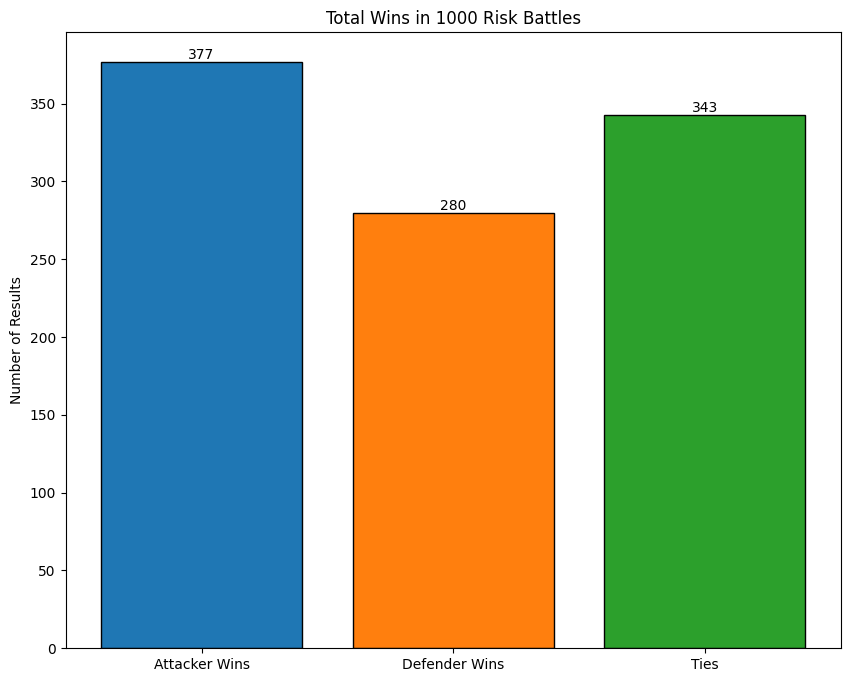

In [22]:
# Initialize counters for tracking overall battle results.
attacker_wins = 0
defender_wins = 0
ties = 0 
attacker_losses_total = []
defender_losses_total = []
winner_history = [] 

# Simulate 1000 battles.
for _ in range(1000):
    # Simulate one battle round, ignoring the dice values (using _).
    attacker_losses, defender_losses, winner, _, _ = simulate_battle()  # _ used to ignore dice results.
    
    # Collect the losses for the attacker and defender.
    attacker_losses_total.append(attacker_losses)
    defender_losses_total.append(defender_losses)
    winner_history.append(winner)
    
    # Increment the winner counter based on the result.
    if winner == "Attacker":
        attacker_wins += 1  # Increment attacker win count.
    elif winner == "Defender":
        defender_wins += 1  # Increment defender win count.
    else:
        ties += 1  # Increment tie count.

# Output the total results from the 1000 simulations.
print(f"Total Attacker Wins: {attacker_wins}")
print(f"Total Defender Wins: {defender_wins}")
print(f"Ties: {ties}")

# Create a bar chart showing the total win counts for each side, including ties.
plt.figure(figsize=(10, 8))
bars = plt.bar(
    ['Attacker Wins', 'Defender Wins', 'Ties'],
    [attacker_wins, defender_wins, ties],
    color=['#1f77b4', '#ff7f0e', '#2ca02c'],  # New colors: Blue, Orange, Green
    edgecolor='black'
)
plt.title('Total Wins in 1000 Risk Battles')
plt.ylabel('Number of Results')

# Annotate each bar with its corresponding value.
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

# Display the plot.
plt.show()

Battle Result: Attacker Wins!


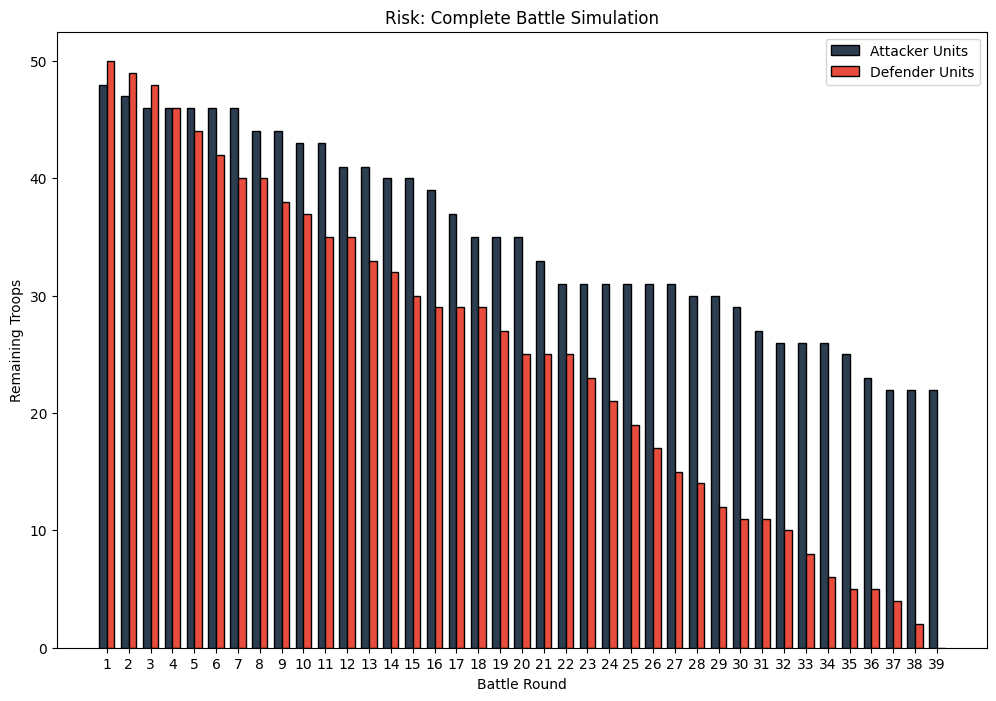

In [23]:
# Simulate a complete conflict between the attacker and defender.
def conduct_full_battle(attacker_units, defender_units):
    attacker_progress = []  # Track the remaining troops of the attacker.
    defender_progress = []  # Track the remaining troops of the defender.
    battle_rounds = []       # Record the round numbers.
    
    round_count = 1  # Initialize the first round.
    while attacker_units > 0 and defender_units > 0:
        # Execute one battle round
        attacker_loss, defender_loss, _, _ = conduct_battle_round(attacker_units, defender_units)
        
        # Update the unit counts.
        attacker_units -= attacker_loss
        defender_units -= defender_loss
        
        # Log the results of this round.
        attacker_progress.append(attacker_units)
        defender_progress.append(defender_units)
        battle_rounds.append(round_count)
        
        # Move to the next round.
        round_count += 1
    
    return battle_rounds, attacker_progress, defender_progress

# Simulate a single round of battle.
def conduct_battle_round(attacker_units, defender_units):
    # Attacker rolls 3 dice (limited by the number of remaining units).
    attacker_rolls = np.sort(np.random.randint(1, 7, min(3, attacker_units)))[::-1]
    
    # Defender rolls 2 dice (limited by the number of remaining units).
    defender_rolls = np.sort(np.random.randint(1, 7, min(2, defender_units)))[::-1]
    
    # Initialize the number of losses.
    attacker_loss = 0
    defender_loss = 0
    
    # Compare the rolls, highest to lowest dice.
    for i in range(min(len(attacker_rolls), len(defender_rolls))):
        if attacker_rolls[i] > defender_rolls[i]:
            defender_loss += 1
        else:
            attacker_loss += 1
    
    return attacker_loss, defender_loss, attacker_rolls, defender_rolls

# Starting number of troops for both sides.
initial_attacker_units = 50 
initial_defender_units = 50  

# Simulate the entire battle.
rounds, attacker_progress, defender_progress = conduct_full_battle(initial_attacker_units, initial_defender_units)

# Determine the winner based on remaining troops.
if attacker_progress[-1] == 0:
    print("Battle Result: Defender Wins!")
else:
    print("Battle Result: Attacker Wins!")

# Visualize the progress of both sides.
bar_width = 0.35
positions = np.arange(len(rounds))

plt.figure(figsize=(12, 8))

# Plot attacker and defender troop counts for each round.
plt.bar(positions - bar_width/2, attacker_progress, bar_width, label='Attacker Units', color='#2c3e50', edgecolor='black')
plt.bar(positions + bar_width/2, defender_progress, bar_width, label='Defender Units', color='#e74c3c', edgecolor='black')

# Add labels and title.
plt.title('Risk: Complete Battle Simulation')
plt.xlabel('Battle Round')
plt.ylabel('Remaining Troops')
plt.xticks(positions, rounds)
plt.legend()

# Show the plot.
plt.show()

## Reference:

**Numpy**  

**Available at:** [W3Schools - Numpy Introduction](https://www.w3schools.com/python/numpy_intro.asp)  

**Brief:** Numpy is a powerful Python library used for numerical computing. It provides support for large, multi-dimensional arrays and matrices, along with a collection of mathematical functions to operate on these arrays. Numpy is commonly used for data manipulation, scientific computing, and numerical simulations.


**Matplotlib**  

**Available at:** [Matplotlib - Pyplot Tutorial](https://matplotlib.org/stable/tutorials/introductory/pyplot.html) 

**Brief:** Matplotlib is a plotting library for Python that is used to create static, animated, and interactive visualizations. The pyplot module is one of the most commonly utilized features of Matplotlib, offering functions to create various chart types such as line plots, bar graphs, histograms, and scatter plots. It is widely used for data visualization in fields such as science, engineering, and data analysis.

**How to Play Risk | Official Rules**  

**Available at:** [UltraBoardGames - Risk Rules](https://ultraboardgames.com/risk/rules.php)  

**Brief:** This reference provides the official rules for playing the Risk board game. It outlines the game mechanics, including how battles are decided using dice, how troops are deployed, and how territories are captured. Understanding these rules is essential for grasping the strategic elements of Risk, including how to play individual battles and complete the game.